In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.stattools import adfuller


In [3]:
df = pd.read_csv("../data/BrentOilPrices.csv")

df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')
df = df.set_index('Date')

df.head()


C:\Users\Hanan\AppData\Local\Temp\ipykernel_18236\612709343.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


,Price
Date,
1987-05-20,18.63
1987-05-21,18.45
1987-05-22,18.55
1987-05-25,18.60
1987-05-26,18.63


In [4]:
df.info()
df.describe()
df.isna().sum()


<class 'pandas.DataFrame'>
DatetimeIndex: 9011 entries, 1987-05-20 to 2022-11-14
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   9011 non-null   float64
dtypes: float64(1)
memory usage: 140.8 KB


Price    0
dtype: int64

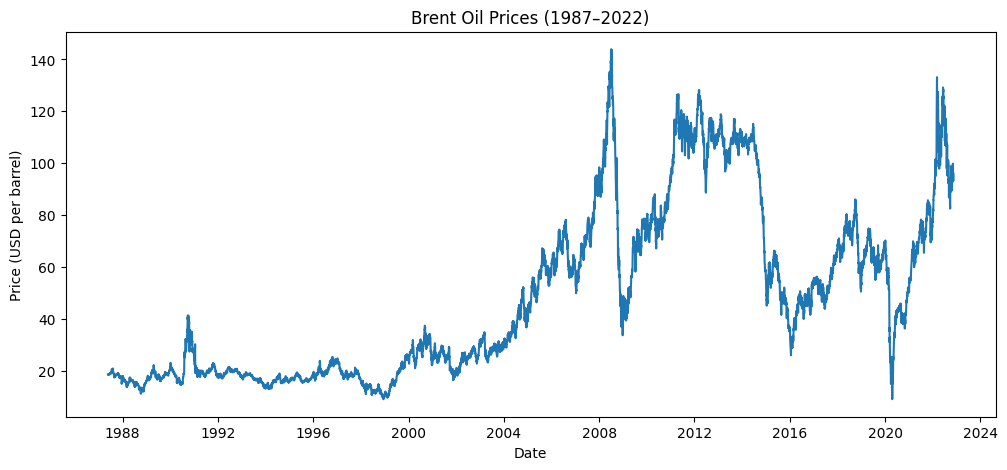

In [5]:
plt.figure(figsize=(12,5))
plt.plot(df.index, df['Price'])
plt.title("Brent Oil Prices (1987–2022)")
plt.xlabel("Date")
plt.ylabel("Price (USD per barrel)")
plt.show()


In [6]:
df['log_return'] = np.log(df['Price']) - np.log(df['Price'].shift(1))
df = df.dropna()


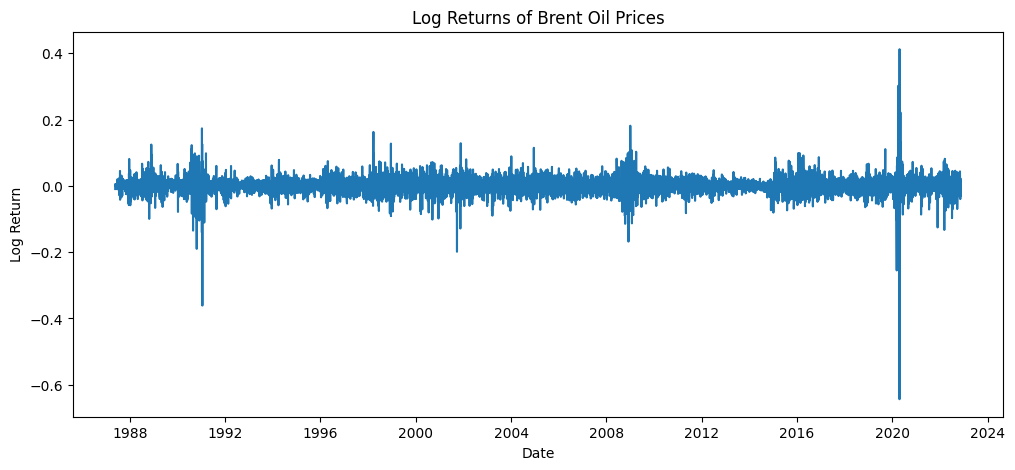

In [7]:
plt.figure(figsize=(12,5))
plt.plot(df.index, df['log_return'])
plt.title("Log Returns of Brent Oil Prices")
plt.xlabel("Date")
plt.ylabel("Log Return")
plt.show()


In [8]:
adf_result = adfuller(df['log_return'])

print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])


ADF Statistic: -16.427113494485894
p-value: 2.4985801611428892e-29


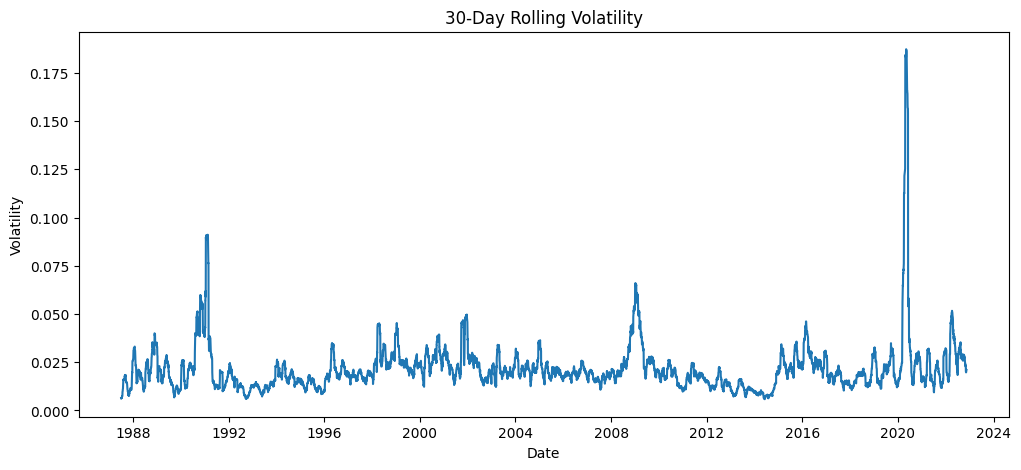

In [10]:
df['rolling_std'] = df['log_return'].rolling(window=30).std()

plt.figure(figsize=(12,5))
plt.plot(df.index, df['rolling_std'])
plt.title("30-Day Rolling Volatility")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.show()


The observed non-stationarity in raw prices and volatility clustering in log returns indicate structural instability in the Brent oil market. These characteristics motivate the use of Bayesian Change Point models, which allow detection of regime shifts while explicitly modeling uncertainty.
